<a href="https://colab.research.google.com/github/OhJunYoung21/artificial-inteliigence/blob/main/Jarvis_final(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np


f = pd.read_csv('/content/tomato.csv',encoding = 'cp949')

tomato_df = pd.DataFrame(f)

tomato_df

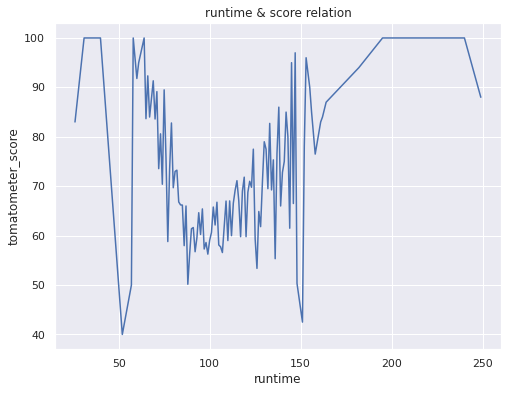

In [52]:
Run_1 = tomato_df.groupby(by='Runtime')


RUN_1 = pd.DataFrame(Run_1['TOMATOMETER score'].mean())

import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.title('runtime & score relation')
plt.xlabel('runtime')
plt.ylabel('tomatometer_score')
plt.plot(RUN_1)
plt.show()


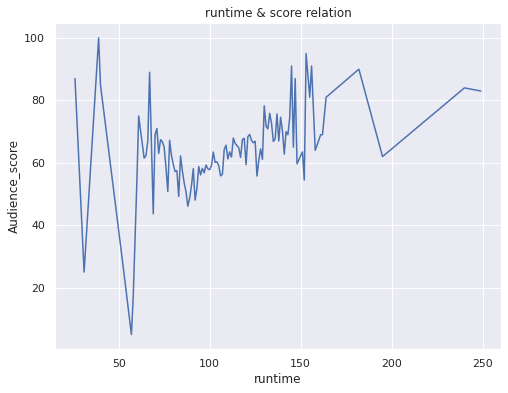

In [53]:
Run_1 = tomato_df.groupby(by='Runtime')


RUN_1 = pd.DataFrame(Run_1['AUDIENCE score'].mean())

import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.title('runtime & score relation')
plt.xlabel('runtime')
plt.ylabel('Audience_score')
plt.plot(RUN_1)
plt.show()


런타임과 영화평점의 관계를 한눈에 보여주는 코드입니다.

In [ ]:
import seaborn as sns
sns.distplot(tomato_df['Runtime'],kde=False, bins=10)   

런타임의 분포를 보기 위해서 소스코드를 작성하였습니다. 


In [ ]:
ax=plt.subplot()
ax=sns.distplot(tomato_df['TOMATOMETER score'],kde=False,color='skyblue', bins=10)
ax=sns.distplot(tomato_df['AUDIENCE score'],kde=False,color='red', bins=10)
ax.set_xlabel("AUDIENCE score & TOMATOMETER score")
ax.set_ylabel("Count")
ax.set_title("Difference between AUDIENCE and TOMATOMETER score distribution")
ax=plt.legend(labels = ['TOMATOMETER score','AUDIENCE score'],loc = 'upper left')

실제 관객들이 메긴 점수와 비평가들이 메긴 점수를 보여주는 코드입니다. 보시다시피 90~100점에서 그 차이가 상당히 크다는 것을 알수 있습니다. 쉽게 말하면 TOMATOMETER score의 점수가 100인 것보다 AUDIENCE score의 점수가 100인것이 월등히 적습니다.
여기서 낼 수 있는 결론은 점수가 높아질수록 평론가와 관객의 간극이 벌어진다는 점을 알 수 있습니다.

In [ ]:
count, bins_divders = np.histogram(tomato_df['Runtime'], bins=9)
#각 구간에 속하는 개수 와 경계값 리스트 반환
print(count,'\n',bins_divders)
bin_names=['25~50','50~75','75~100','100~125',
           '125~150','150~175','175~200','200~225','225~250']
tomato_df['Runtime_bin'] = pd.cut(x = tomato_df['Runtime'], 
                     bins = bins_divders,
                     labels = bin_names,
                    include_lowest = True)
tomato_df.head()

In [ ]:
#2.각 카테고리에 해당하는 값끼리 묶은 후 그에 해당하는 관객과 토마토 평점의 평균을 구함다.
#주의 : 쓸대없는 코드가 괜히 들어가 있을경우 수정 환영합니다.
Run_bin = tomato_df.groupby('Runtime_bin')['TOMATOMETER score'].mean()
Run_bin_aud = tomato_df.groupby('Runtime_bin')['AUDIENCE score'].mean()
Run_bin = pd.DataFrame(Run_bin)
Run_bin_aud = pd.DataFrame(Run_bin_aud)
Run_bin=Run_bin['TOMATOMETER score'].fillna(0)
Run_bin_aud=Run_bin_aud['AUDIENCE score'].fillna(0)
print(Run_bin_aud)

#이 시점에서 갠적으로 하나의 데이터 프레임에 런타임/관객평/토마토평 
#3개의 열을 갖는 데이터 프레임을 만들고 싶어서 밑에 있는 코드 무지성으로 배낌
num_1 = np.arange(0,len(Run_bin.index),1).tolist()
aud_1 = Run_bin_aud.values

Run_bin  = pd.DataFrame({'Runtime_bin':Run_bin.index,
                      'TOMATOMETER score':Run_bin.values},
                     index = num_1,columns = ['Runtime_bin','TOMATOMETER score']
                      )

#데이터 프레임이 되어버린 Run_bin에게 리스트인 aud_1을 추가해줍시다
Run_bin['AUDIENCE score']=aud_1

Run_bin=Run_bin.drop(index=7)
#비어있는 행 삭제

print(Run_bin)

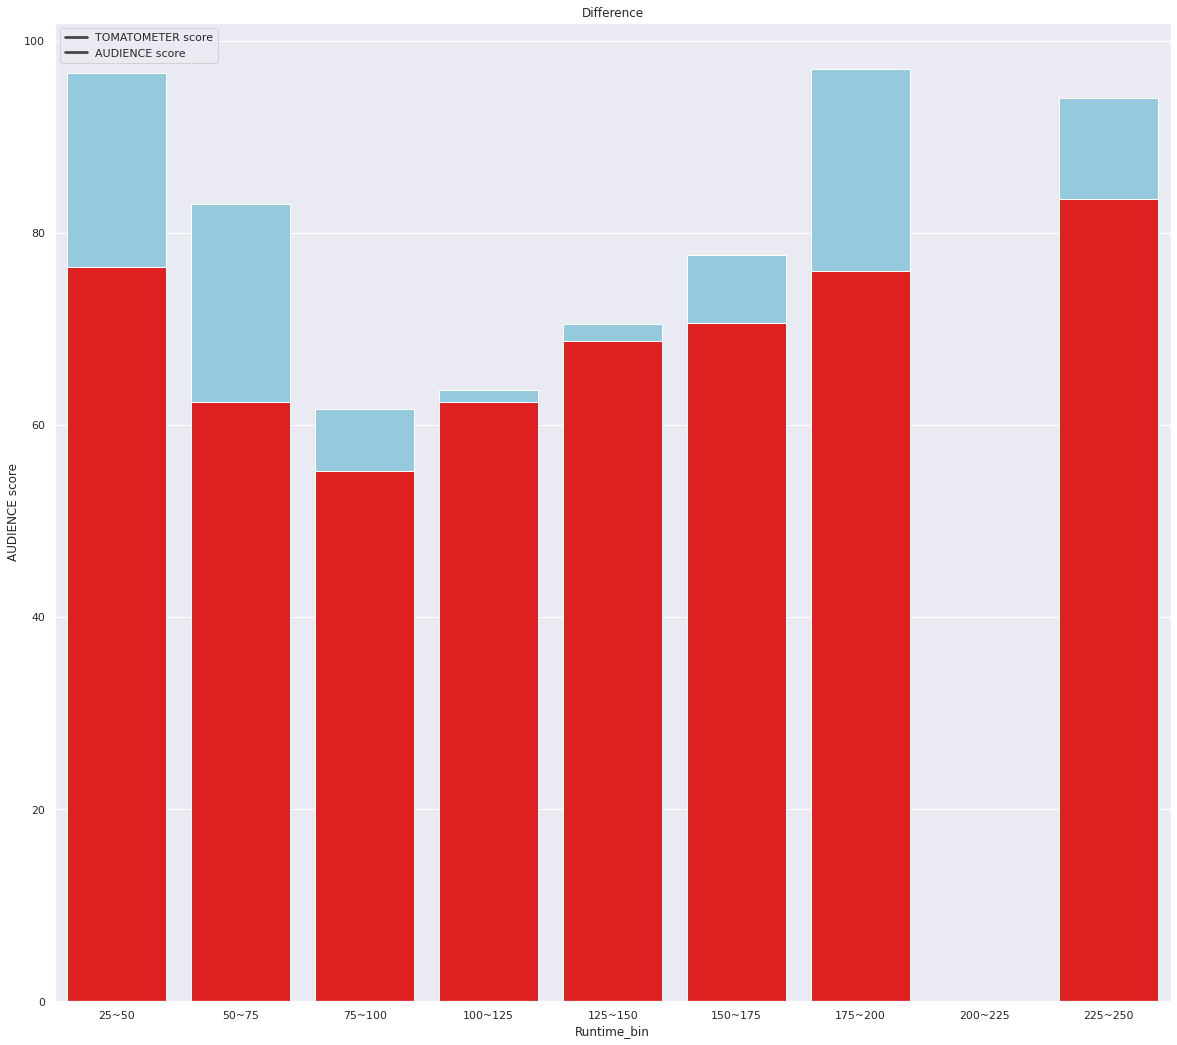

In [54]:
ax=plt.subplot()
ax.set_title("Difference")
ax=sns.barplot(x='Runtime_bin',y='TOMATOMETER score',color='skyblue',data=Run_bin)
ax=sns.barplot(x='Runtime_bin',y='AUDIENCE score',color='red',data=Run_bin)
ax=sns.set(rc = {'figure.figsize':(10,8)})
ax=plt.legend(labels = ['TOMATOMETER score','AUDIENCE score'],loc = 'upper left')

이 데이터를 보면 상영시간이 75~100분 사이일 때는 둘다 평점이 저조하였습니다. 반면, 그보다 적은 시간대에서는  상영시간이 적을 수록 평점이 높았고, 그보다 많은 시간대에서는 상영시간이 길수록 평점이 높은 점을 알수 있었습니다.

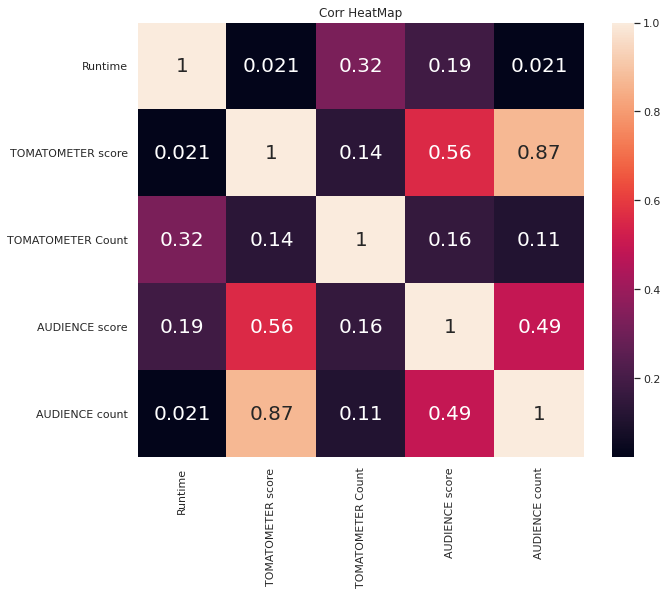

In [56]:
heat_list=['Runtime','TOMATOMETER score','TOMATOMETER Count',
           'AUDIENCE score','AUDIENCE count']
sns.set(rc={'figure.figsize':(10,8)})
correlation_matrix=tomato_df.corr().round(3)
sns.heatmap(data=correlation_matrix,
            xticklabels=heat_list,yticklabels=heat_list,
            annot=True,annot_kws={"size": 20})
plt.title("Corr HeatMap")
plt.show()

히트맵에서 얻을 수 있는 결론은 AUDIENCE score과 TOMATOMETER score는 0.056으로 충분한 상관관계를 보이고 있습니다. 그래서 저희는 runtime,상영등급으로 평론가의 점수와 관객의 점수를 한번 맞춰보도록 하겠습니다.
(사용한 인공지능 모델, 로지스틱회귀와 Tf_id를 사용했습니다.)

In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split 


score_data = tomato_df['Runtime']
score_target = tomato_df['TOMATOMETER score']


x_train,x_test,y_train,y_test = train_test_split(score_data,score_target,random_state = 0)


x_train = x_train[:,np.newaxis]

x_test = x_test[:,np.newaxis]    #1차원의 배열로는 학습이 불가능하기 때문에 np.newaxis를 사용해서 차원을 늘려주었습니다.

lin_1 = LogisticRegression()
lin_1.fit(x_train,y_train)


score = lin_1.score(x_test,y_test)  #score를 알아봅시다.


print("선형회귀를 사용했을 때의 점수(지도학습):{:.2f}".format(score))  #소수점 2번째 자리까지 출력할 것이다.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  


선형회귀를 사용했을 때의 점수(지도학습):0.05


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split 


score_data = tomato_df['Runtime']
score_target = tomato_df['AUDIENCE score']


x_train,x_test,y_train,y_test = train_test_split(score_data,score_target,random_state = 0)


x_train = x_train[:,np.newaxis]

x_test = x_test[:,np.newaxis]    #1차원의 배열로는 학습이 불가능하기 때문에 np.newaxis를 사용해서 차원을 늘려주었습니다.

lin_1 = LogisticRegression()
lin_1.fit(x_train,y_train)


score = lin_1.score(x_test,y_test)  #score를 알아봅시다.


print("선형회귀를 사용했을 때의 점수(지도학습):{:.2f}".format(score))  #소수점 2번째 자리까지 출력할 것이다.

런타임으로 평론가의 평점을 예측하는 모델을 만들려고 하였으니 정확도는 5%로 부정확한 결과를 얻었습니다.그래서 텍스트데이터로 분석을 시도하였습니다.

In [59]:
import numpy as np

np.mean(tomato_df['AUDIENCE score'])

59.016666666666666

In [60]:
tomato_df['Tf_id'] = (tomato_df['TOMATOMETER score'] >= 63)
tomato_df['Tf_id_2'] = (tomato_df['AUDIENCE score'] >= 59)

In [61]:
from matplotlib.scale import LogisticTransform
from sklearn.model_selection import GridSearchCV


In [39]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline

pipe = make_pipeline(TfidfVectorizer(min_df=5),LogisticRegression(max_iter=1000))

param_grid = {'logisticregression__C':[0.001,0.01,0.1,1,10]}
grid = GridSearchCV(pipe,param_grid,cv=5)


text_train,text_test,score_train,score_test = train_test_split(tomato_df['Rating'],tomato_df['Tf_id'],random_state=0)



grid.fit(text_train,score_train)

print("최상의 교차 검증 점수:{:.2f}".format(grid.best_score_))

최상의 교차 검증 점수:0.63


In [62]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline

pipe = make_pipeline(TfidfVectorizer(min_df=5),LogisticRegression(max_iter=1000))

param_grid = {'logisticregression__C':[0.001,0.01,0.1,1,10]}
grid = GridSearchCV(pipe,param_grid,cv=5)


text_train,text_test,score_train,score_test = train_test_split(tomato_df['Rating'],tomato_df['Tf_id_2'],random_state=0)



grid.fit(text_train,score_train)

print("최상의 교차 검증 점수:{:.2f}".format(grid.best_score_))

최상의 교차 검증 점수:0.56


In [63]:
vectorizer = grid.best_estimator_.named_steps['tfidfvectorizer']

x_train = vectorizer.transform(text_train)

feature_names = np.array(vectorizer.get_feature_names())


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [64]:
!pip install mglearn

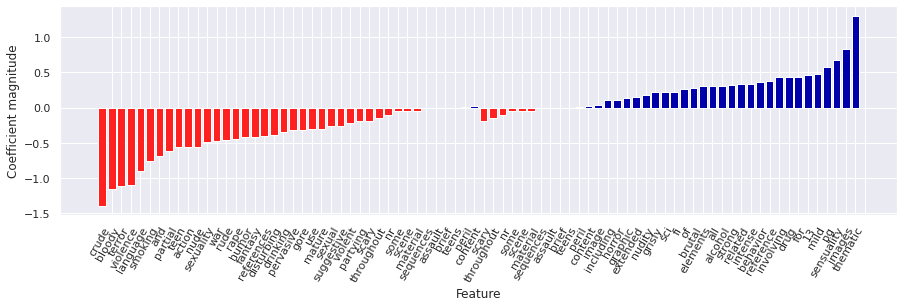

In [65]:
import mglearn

mglearn.tools.visualize_coefficients(
    grid.best_estimator_.named_steps["logisticregression"].coef_[0],
    feature_names,n_top_features=40
)